In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\Git demo\Email_spam_classifier\emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
# for null column
null_counts = df.isnull().sum()
# Filter columns with more than one null value
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [6]:
x = df.iloc[:,1:3001]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [8]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 ,random_state=12)

In [9]:
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4075,2,1,3,0,1,2,13,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4835,10,7,3,8,3,5,99,0,0,14,...,0,0,0,0,1,0,0,0,6,0
4439,6,5,4,2,0,9,57,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3910,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
2398,0,1,1,0,4,0,14,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18,11,16,7,5,3,126,1,14,29,...,0,0,0,0,0,0,0,0,0,0
2513,0,4,1,2,0,0,27,0,1,6,...,0,0,0,0,0,0,0,0,0,0
1662,2,4,2,3,1,1,104,0,0,18,...,0,0,0,0,1,0,0,0,3,0
3810,7,2,1,2,1,1,26,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_test

4075    0
4835    0
4439    0
3910    0
2398    1
       ..
4367    0
2513    1
1662    1
3810    1
570     1
Name: Prediction, Length: 1035, dtype: int64

In [11]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
x_test

array([[-0.35891325, -0.5003466 , -0.12235306, ..., -0.06045726,
        -0.43681799, -0.05569   ],
       [ 0.24609524,  0.09126657, -0.12235306, ..., -0.06045726,
         2.66688881, -0.05569   ],
       [-0.056409  , -0.10593782, -0.03525855, ..., -0.06045726,
        -0.43681799, -0.05569   ],
       ...,
       [-0.35891325, -0.20454002, -0.20944756, ..., -0.06045726,
         1.11503541, -0.05569   ],
       [ 0.01921706, -0.40174441, -0.29654207, ..., -0.06045726,
        -0.43681799, -0.05569   ],
       [ 0.17046918,  2.45771929,  0.22602497, ..., -0.06045726,
         3.70145774,  7.14920391]])

In [14]:
x_train

array([[ 0.03400932, -0.12976689,  0.25015209, ..., -0.05827165,
         0.36146048, -0.07973164],
       [-0.40676933, -0.55642744, -0.29495151, ..., -0.05827165,
         0.0229135 , -0.07973164],
       [ 0.73925515, -0.02310176,  0.18201414, ..., -0.05827165,
         0.36146048, -0.07973164],
       ...,
       [ 1.35634525,  0.61688907,  0.99966954, ..., -0.05827165,
         0.36146048, -0.07973164],
       [-0.40676933, -0.4497623 , -0.29495151, ..., -0.05827165,
         0.0229135 , -0.07973164],
       [ 0.91556661,  1.5768753 ,  1.88546289, ..., -0.05827165,
         1.03855444, -0.07973164]])

# **Logistic Regression**

In [15]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,random_state=12)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=12)

In [16]:
#Predicting the test set result  
y_pred = lr.predict(x_test)

In [17]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [18]:
#Creating the Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[695,   4],
       [ 24, 312]], dtype=int64)

In [19]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9729468599033816

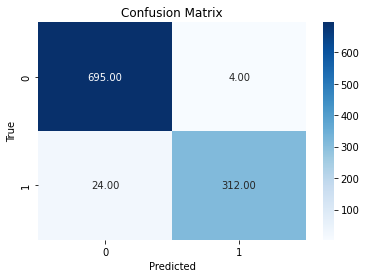

In [20]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

In [22]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Precision: 0.9873417721518988
Recall: 0.9285714285714286
F1 Score: 0.9570552147239264
AUC-ROC Score: 0.9897770624701955


# **Decision Tree**

In [23]:
#import decision tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [24]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
#Predicting the test set result  
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [26]:
cm = confusion_matrix(y_test, y_pred_dtc)
cm

array([[681,  18],
       [ 70, 266]], dtype=int64)

In [27]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dtc)

0.914975845410628

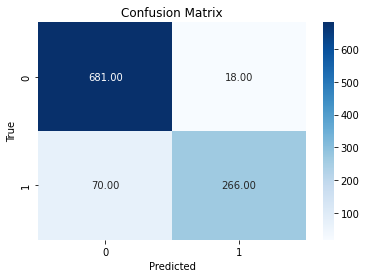

In [28]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest** 

In [29]:
# Fitting Decision Tree classifier to the training set 
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [31]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[687,  12],
       [ 52, 284]], dtype=int64)

In [32]:
#accuracy score
accuracy_score(y_test, y_pred_rfc)

0.9381642512077295

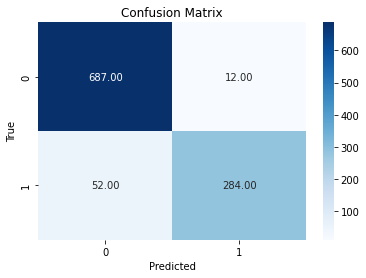

In [33]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Naive Bayes**

In [34]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)

GaussianNB()

In [35]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[696,   3],
       [177, 159]], dtype=int64)

In [37]:
#accuracy score
accuracy_score(y_test, y_pred_nb)

0.8260869565217391

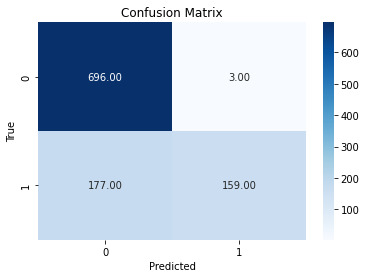

In [38]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **K-Nearest Neighbor(KNN)**

In [39]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [40]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

In [42]:
#accuracy score
accuracy_score(y_test, y_pred_knn)

0.8676328502415459

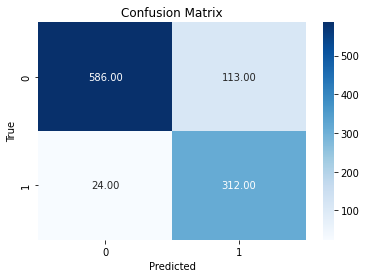

In [43]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Support Vector Machine(svm)**

In [44]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [45]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]], dtype=int64)

In [47]:
#accuracy score
accuracy_score(y_test, y_pred_svc)

0.9439613526570049

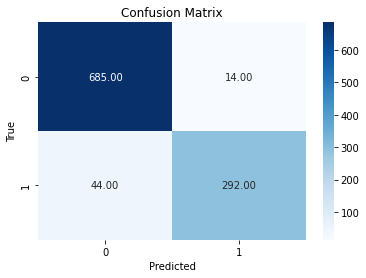

In [48]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### The best algorithm for this dataset is Logistic Regression.